<a href="https://colab.research.google.com/github/chokkan/deeplearning/blob/master/notebook/resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification

## Load a ResNet50 pretrained model

In [1]:
import torch
model = torch.hub.load('pytorch/vision:v0.6.0', 'resnet50', pretrained=True)
model.eval()

Downloading: "https://github.com/pytorch/vision/archive/v0.6.0.zip" to /root/.cache/torch/hub/v0.6.0.zip
Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [2]:
import pickle
import urllib
labels = pickle.load(urllib.request.urlopen("https://gist.githubusercontent.com/yrevar/6135f1bd8dcf2e0cc683/raw/d133d61a09d7e5a3b36b8c111a8dd5c4b5d560ee/imagenet1000_clsid_to_human.pkl"))

## Load a test image

In [3]:
url, filename = ("http://www.chokkan.org/temp/cat.jpg", "src.jpg")
try:
    urllib.URLopener().retrieve(url, filename)
except:
    urllib.request.urlretrieve(url, filename)

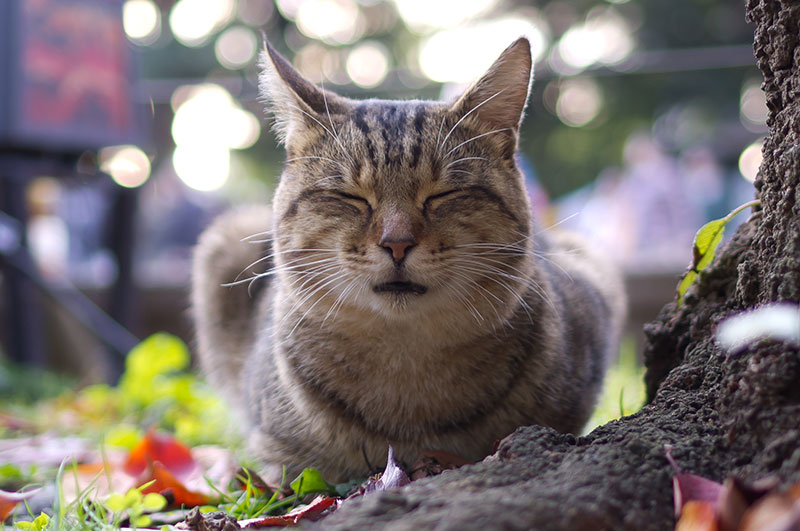

In [4]:
from PIL import Image
from torchvision import transforms

# Load the target image and convert it to a tensor.
input_image = Image.open(filename)
input_image

## Classify the image

In [5]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0)

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)

prob = torch.nn.functional.softmax(output[0], dim=0)
_, indices = torch.topk(output[0], 5, dim=0)
for index in indices:
    i = index.item()
    print(i, labels[i], prob[i].item())

282 tiger cat 0.5979045033454895
281 tabby, tabby cat 0.28770843148231506
285 Egyptian cat 0.10731825232505798
292 tiger, Panthera tigris 0.0013949823332950473
728 plastic bag 0.0005002128891646862
